Customer Churn Analysis:

DataSet Details:
customerID: Unique customer id
gendercustomer gender 

SeniorCitizen: Indic te the customer is 65 or o,No

Partner: Indicates if customer has a pter .

Dependents: Indicates if the customer lives with any det, etc.

tenure: Number of months with tecompany.

PoneService: Indicates if the customer subscribes to home phone service withay: Yes, No

ultipleLines: Indicates if the customer subscribes to multiple telephone lines wimany: Yes, No

nternetService: Indicates if the customer subscribes to Internet service e Optic, Cable.
OnlineSecurity: Indicates if the customer subscribes to an additional online security service proviecompany: Yes,No

OnlineBackup: Indicates if the customer subscribes to an additional online backup service prote company: Yes, No

DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment pythe company:Yes, No

TechSupport: Indicates if the customer subscribes to an additional technical support plan from the companyued wait time: Yes, No

StreamingTV: Indicates if the customer uses their Internet service to stream television programing foal fee for this ervice.

StreamingMovies: Indicates if the customer uses their Internet service to stream moviesional fee for this service.

Contract: Indicates the customer’s current contract type: Month-o-Month, One Year, Two Year.
PaperlessBillin: Indicates if the customer h chosen paperless billinga chsen paperless billing: Yes, No

PaymentMethod: Indicaithdrawal, Credit Card, Mailed Check
 thlyCharges: Indicates the customer’s current total monthly charge fr all their serices from the company.

TotalCharges: Indicates the customer’s total charges, calculated  the endof the quarter specified above.

Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [89]:
df=pd.read_csv("C:\\Users\\jaiad\\OneDrive\\Desktop\\Customer Churn\\Customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.shape

(7043, 21)

In [93]:
#There are 3 Numerical Columns in the dataset now lets check for outliers using box-plot for totalcharges but there are some non-numeric values in the totalcharges column becoz of that box-plot could not be plotted now  lets check

In [95]:
non_numeric_rows = df[~df['TotalCharges'].apply(lambda x: isinstance(x, (int, float)) or (isinstance(x, str) and x.replace('.', '', 1).isdigit()))]
if not non_numeric_rows.empty:
    print("Rows with non-numeric 'TotalCharges' values:")
    print(non_numeric_rows[['customerID', 'TotalCharges']])
else:
    print("No non-numeric 'TotalCharges' values found.")

Rows with non-numeric 'TotalCharges' values:
      customerID TotalCharges
488   4472-LVYGI             
753   3115-CZMZD             
936   5709-LVOEQ             
1082  4367-NUYAO             
1340  1371-DWPAZ             
3331  7644-OMVMY             
3826  3213-VVOLG             
4380  2520-SGTTA             
5218  2923-ARZLG             
6670  4075-WKNIU             
6754  2775-SEFEE             


In [136]:
#I have replaced to NAN 
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [144]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#there can be seen that in Tenure column there are 0 but for monthly charges column is not empty.

In [146]:
# before that we have to check weather the tenure column is zero the same 11 columns in total charges as there is no additional missing values we can delete 
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [148]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [ ]:
#as there are missing values in TotalCharges colum we can use capping so we can use mean to add the Missioing values

In [175]:
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [177]:
#Now checking again checkin for Non-Numeric values 
non_numeric_rows = df[~df['TotalCharges'].apply(lambda x: isinstance(x, (int, float)) or (isinstance(x, str) and x.replace('.', '', 1).isdigit()))]
if not non_numeric_rows.empty:
    print("Rows with non-numeric 'TotalCharges' values:")
    print(non_numeric_rows[['customerID', 'TotalCharges']])
else:
    print("No non-numeric 'TotalCharges' values found.")

No non-numeric 'TotalCharges' values found.


In [179]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Outliers in TotalCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


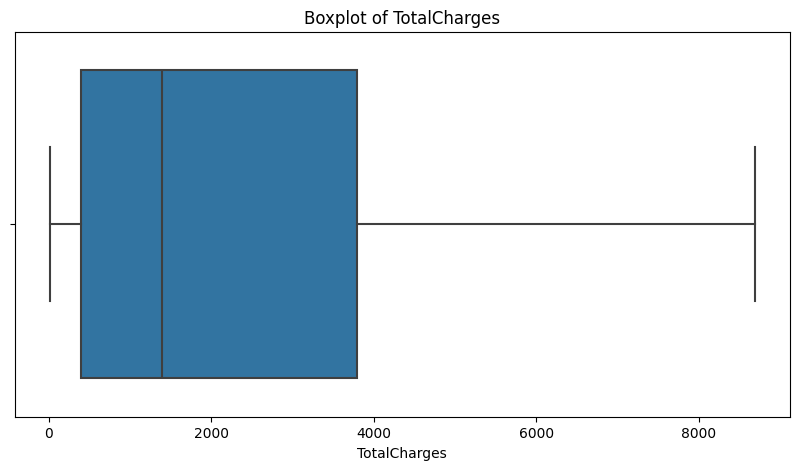

In [181]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
outliers = find_outliers_iqr(df, 'TotalCharges')
print(f'Outliers in TotalCharges:')
print(outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of TotalCharges')
plt.show()

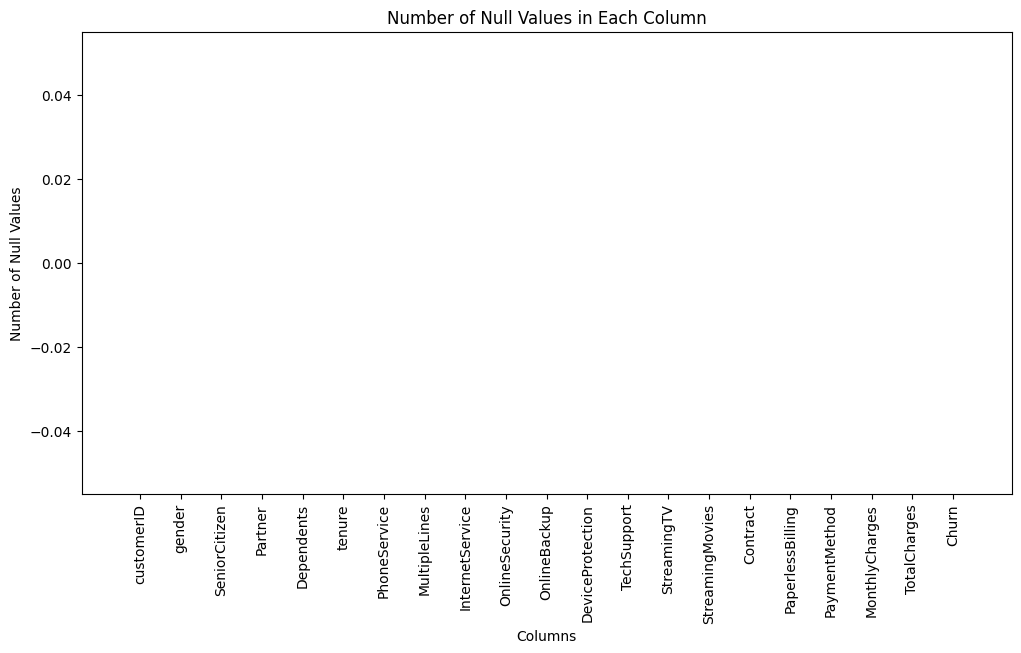

In [183]:
# Visualizing null values by bar plot
plt.figure(figsize=(12, 6))
plt.bar(df.columns, df.isnull().sum(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Column')
plt.show()

Outliers in tenure:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


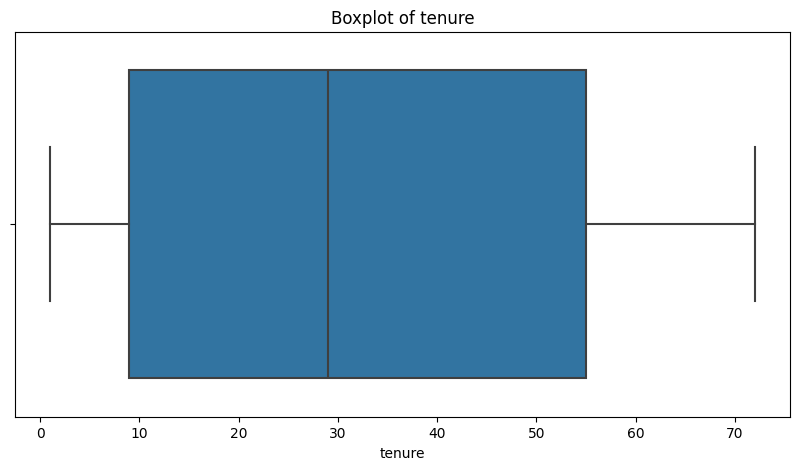

In [185]:
#Checking the null values for tenure
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
numerical_columns = ['tenure']
for column in numerical_columns:
    outliers = find_outliers_iqr(df, column)
    print(f'Outliers in {column}:')
    print(outliers)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['tenure'])
    plt.title(f'Boxplot of {column}')
    plt.show()

Outliers in MonthlyCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


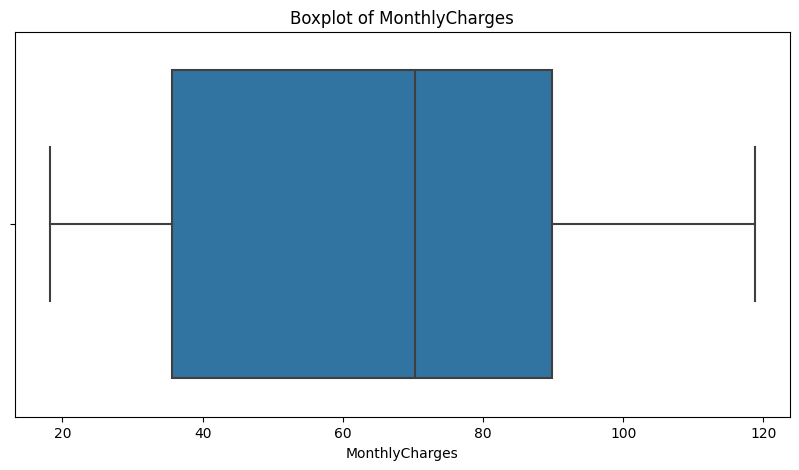

In [166]:
#Checking Null value for Monthlycharges
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_column = ['MonthlyCharges']
for column in numerical_column:
    outliers = find_outliers_iqr(df, column)
    print(f'Outliers in {column}:')
    print(outliers)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['MonthlyCharges'])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [169]:
df.to_excel('updated_data.xlsx', index=False)

In [173]:
#This is the updated shape of the data
df.shape

(7032, 21)

DATA VISUALIZATION

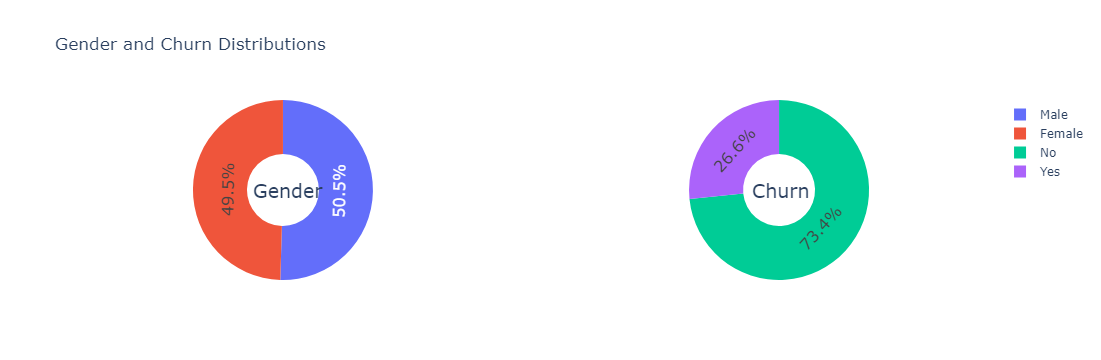

In [223]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
  
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=19, showarrow=False),
                 dict(text='Churn', x=0.81, y=0.5, font_size=19, showarrow=False)])
fig.show()

 INSIGHT:In above Visualization it shows the 49.5% are female and 50.5% are male and 26.6% of customers left and changed to another firm


In [227]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [237]:
#Churn rate based on gender
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [243]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



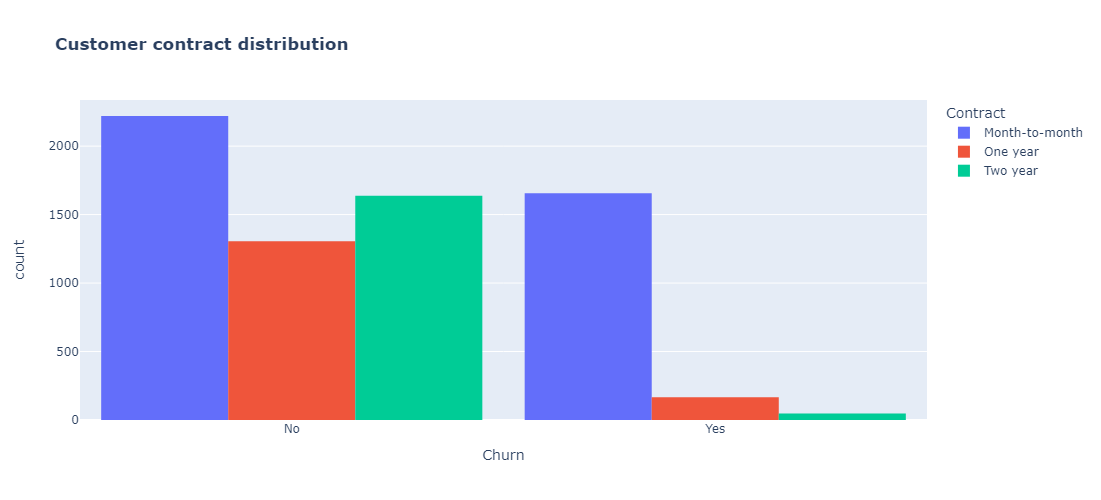

In [245]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

INSIGHT: In this histogram we visualize the distribution of customer churn based on their contract type About 75% of customer with Mont to month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract 

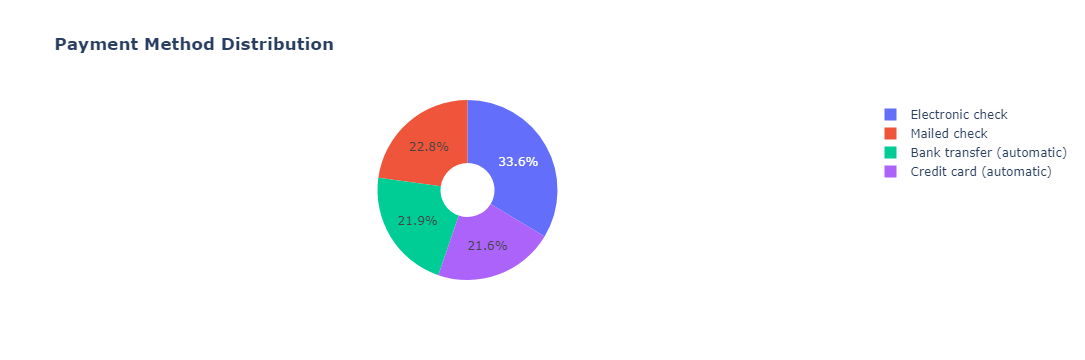

In [247]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [249]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [255]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



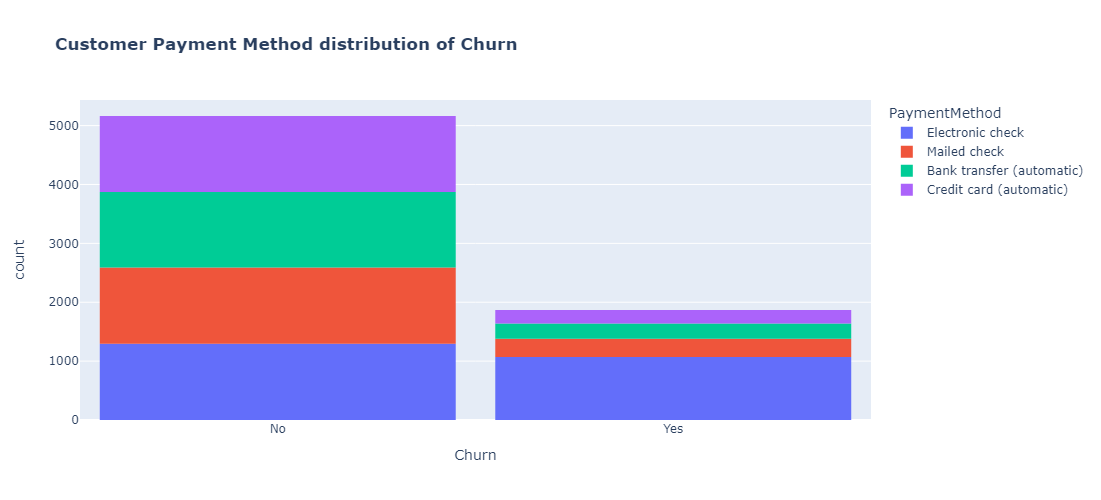

In [275]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution of Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

INSIGHT: customers with Electronic check is more likely to move and customers with Credit card are not likely to leave

In [278]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts() 

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



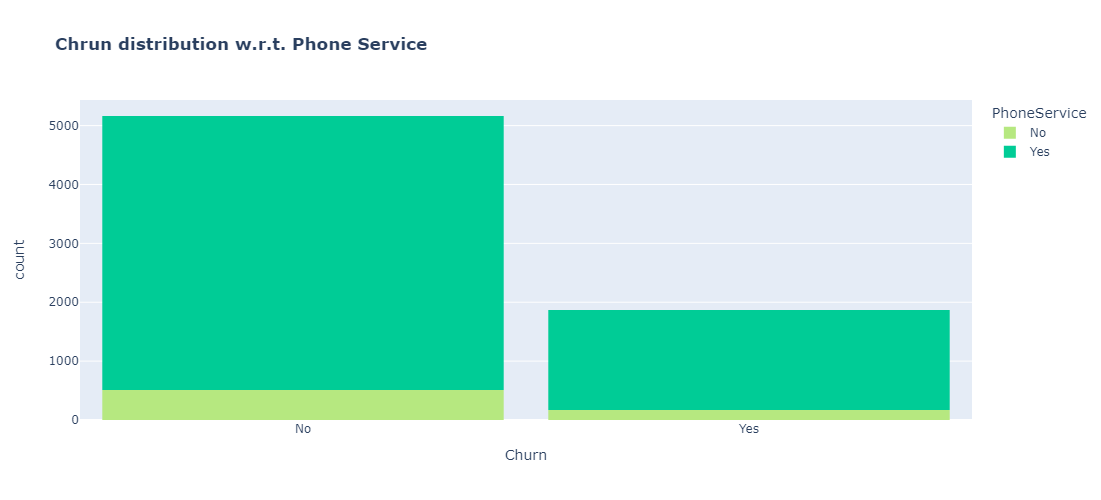

In [340]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

INSIGHT: Very small group of customers don't have a phone service and remaining one-third Customers are more likely to chun


C:\Users\jaiad\AppData\Local\Temp\ipykernel_348\2576396580.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\jaiad\AppData\Local\Temp\ipykernel_348\2576396580.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



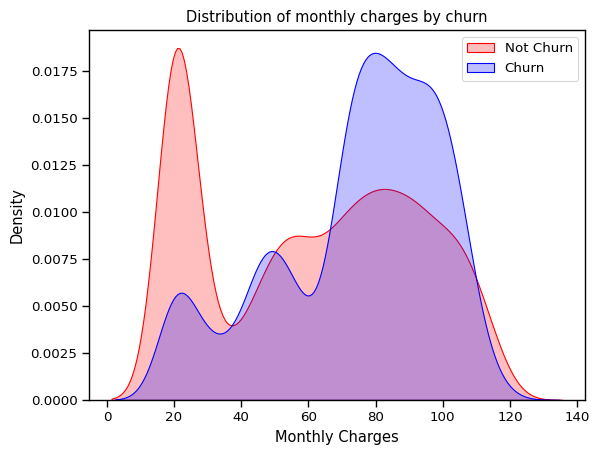

In [282]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

INSIGHT: Customers with higher Monthly Charges are also more likely to churn

C:\Users\jaiad\AppData\Local\Temp\ipykernel_348\2062861112.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\jaiad\AppData\Local\Temp\ipykernel_348\2062861112.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



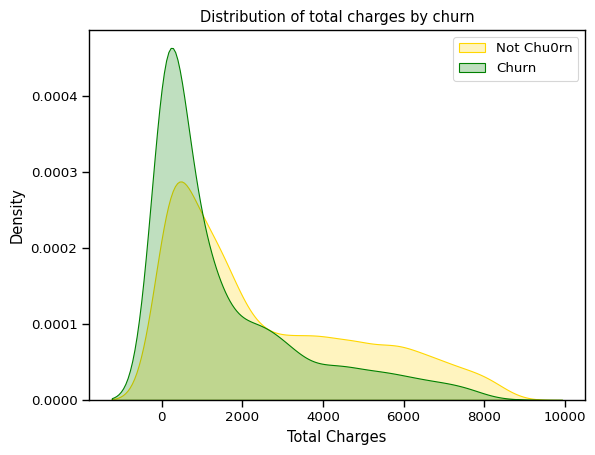

In [285]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

INSIGHT: Customers with lower Monthly Charges are likely to churn

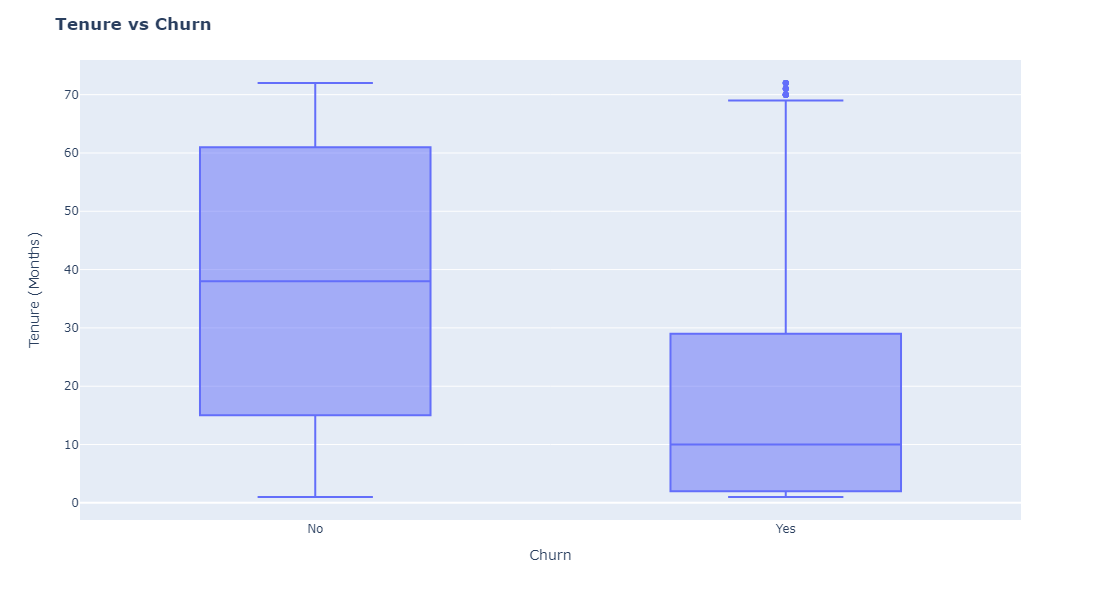

In [336]:
fig = px.box(df, x='Churn', y = 'tenure')
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)
fig.show()


INSIGHT: Newer Customer are Likely to Churn

C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



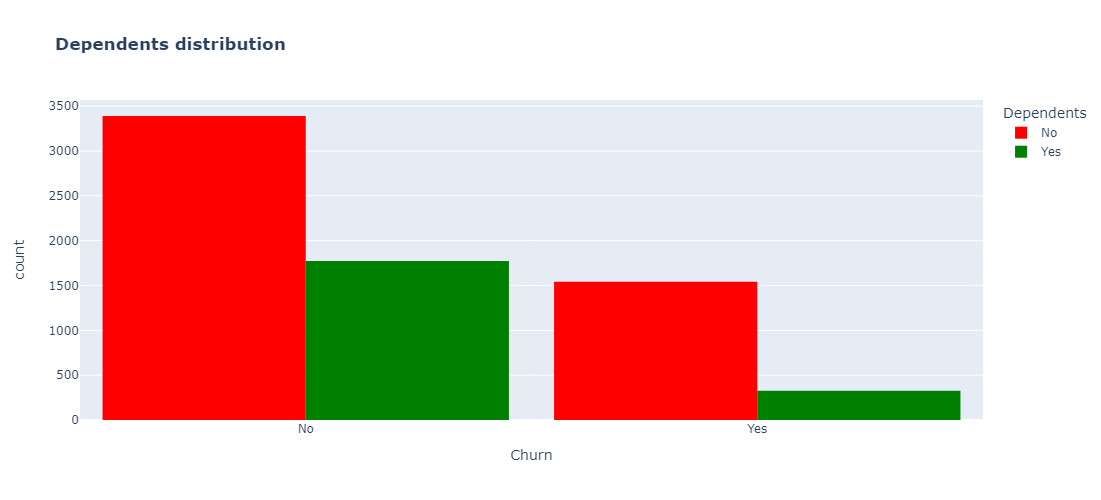

In [342]:
color_map = {"Yes": "green", "No": "red"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
h=700, height=500, bargap=0.1)
fig.show()

INSIGHT: Customers without dependents are more likely to churn

C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



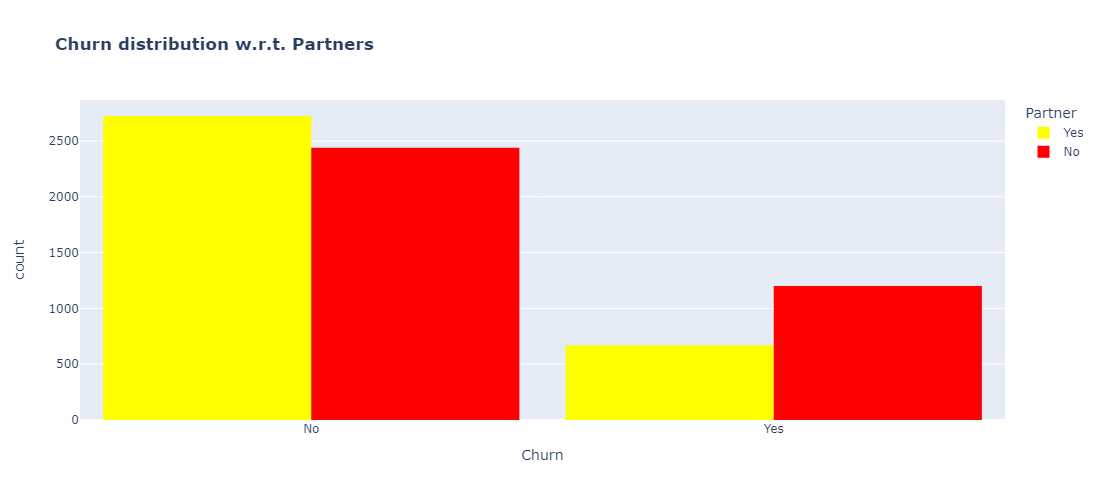

In [355]:
color_map = {"Yes": 'yellow', "No": 'red'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

INSIGHT: Customers who dont have partners are likely to churn